In [27]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

from sklearn import datasets, metrics
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize

from scipy import interp
from itertools import cycle

import tensorflow as tf
from tensorflow.keras import layers
from keras.utils import to_categorical

The goal of this review is to bring to the forefront of your mind the workings of a Sequential model in Keras. This is the same methodology we have used for all of the non SKLearn Neural Networks that have been discussed. Simply put, the type is eponymous - we sequentially evaluate data over layers, in the order specified, first training to minimize our loss function using gradient descent by wiggling our weights and biases, then evaluating (testing) to discover our expected performance on new samples. By this point, you should have a strong understanding of at least these concepts and hopefully some confidence in being able to conquer the problems of loss selection, link function choices, data segmentation for information leakage control, metric and business problem identification, or others!

Please break into your groups and work through the following two problems using the information in previous notebooks or your own experimentation.

# 1) Classification

The following data has been created to perform a multiclass classification process.

In [28]:
X, y = datasets.make_classification(n_samples=5000, n_features=5, n_informative=5, n_redundant=0,
                                    n_clusters_per_class=1, n_classes=5)
X_train, X_test, y_train_l, y_test_l = train_test_split(X, y, test_size=0.25)

TensorFlow expects our categorical information in the form of a one-hot-encoded array. They however are nice enough to provide a method for precisely this task.

In [29]:
y_train = to_categorical(y_train_l)
y_test = to_categorical(y_test_l)

print('Before: ',y_train_l[0])
print('After: ',y_train[0])

Before:  2
After:  [0. 0. 1. 0. 0.]


## Declare your Sequential model and add three ReLU (10) layers. Then, determine and create the output layer.
Disregard any 'colocate_with' errors.

In [30]:
model = tf.keras.Sequential([layers.Dense(10, activation='relu', input_shape=(5,)),
                             layers.Dense(10, activation='relu'),
                             layers.Dense(10, activation='relu'),
                             layers.Dense(5, activation='softmax')])

## Determine the correct loss function. Then, compile your model with an Adam optimizer and the categorical accuracy metric.

In [31]:
model.compile(optimizer='adam',loss=tf.keras.losses.categorical_crossentropy,
              metrics=[tf.keras.metrics.categorical_accuracy])

## Now, we are ready to fit. Please fit the model to the training data for 30 epochs.
Remember to save the history.

In [32]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test,y_test), verbose=0)

## Plot the loss of the training and testing data over epochs.
Be careful about your indexing!

[Text(0, 0.5, 'Loss (Categorical Cross Entropy)'),
 Text(0.5, 0, 'Epoch'),
 Text(0.5, 1.0, 'Train/Test Loss')]

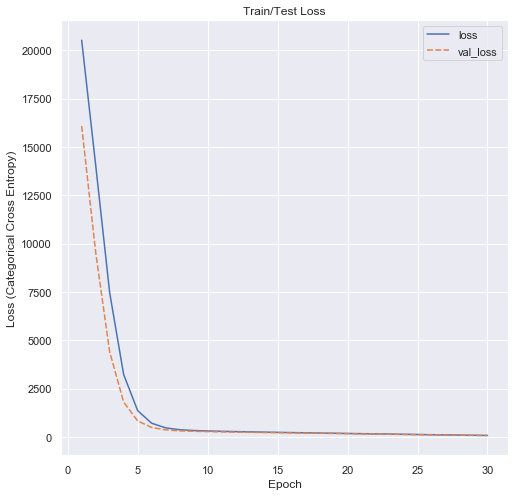

In [33]:
plt.figure(figsize=(8,8))
sns.lineplot(data=epochs[['loss','val_loss']]).set(
    title='Train/Test Loss',xlabel='Epoch',ylabel='Loss (Categorical Cross Entropy)')

## Plot the accuracy metric of the training and testing data over epochs.
Be careful about your indexing!

In [34]:
epochs = pd.DataFrame(history.history)
epochs.index = epochs.index + 1

[Text(0, 0.5, 'Accuracy'),
 Text(0.5, 0, 'Epoch'),
 Text(0.5, 1.0, 'Train/Test Accuracy')]

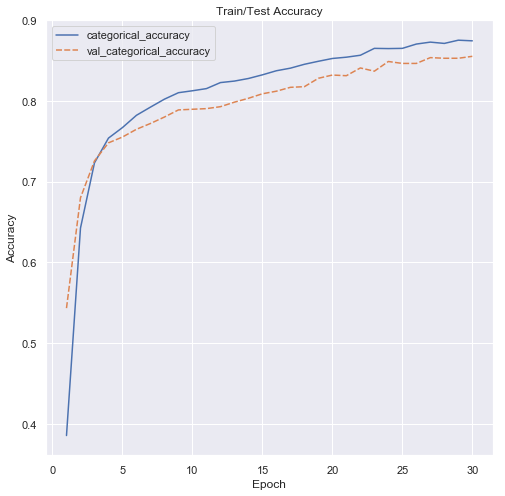

In [35]:
plt.figure(figsize=(8,8))
sns.lineplot(data=epochs[['categorical_accuracy','val_categorical_accuracy']]).set(
    title='Train/Test Accuracy',xlabel='Epoch',ylabel='Accuracy')

I won't make you create the ROC curves and Confusion Matrices as this has been reviewed before. In cases of actual analysis of model perfomance though, this step of TPR/FPR analysis is not optional. Should you have extra time after completing the rest of the workbook, please return to this step and build about the above using previously shared code.

# 2) Regression
The following data has been created for regression, note that one-hot-encoding is no longer required or even conceivable on continuous (or at least ordinal) response data.

In [36]:
X, y = datasets.make_regression(n_samples=5000, n_features=10, noise=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

## Declare your Sequential model (identifying the valid input shape) and add three ReLU (15) layers. Then, determine and create the output layer.

In [37]:
model = tf.keras.Sequential([layers.Dense(10, activation='relu', input_shape=(10,)),
                             layers.Dense(10, activation='relu'),
                             layers.Dense(1, activation='linear')])

## Select what you determine to be the correct loss function. Then, compile your model with an Adam optimizer and the MSE, MAE, and MAPE metrics.

In [38]:
model.compile(optimizer='adam',loss=tf.keras.losses.mean_squared_error,
              metrics=[tf.keras.metrics.mean_squared_error,
                       tf.keras.metrics.mean_absolute_error,
                       tf.keras.metrics.mean_absolute_percentage_error])

## Now, we are ready to fit. Please fit the model to the training data for 30 epochs.
Remember to save the history.

In [39]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test,y_test), verbose=0)

## Plot the loss of the training and testing data over epochs.
Be careful about your indexing!

In [ ]:
epochs = pd.DataFrame(history.history)
epochs.index = epochs.index + 1

[Text(0, 0.5, 'Loss (MSE)'),
 Text(0.5, 0, 'Epoch'),
 Text(0.5, 1.0, 'Train/Test Loss')]

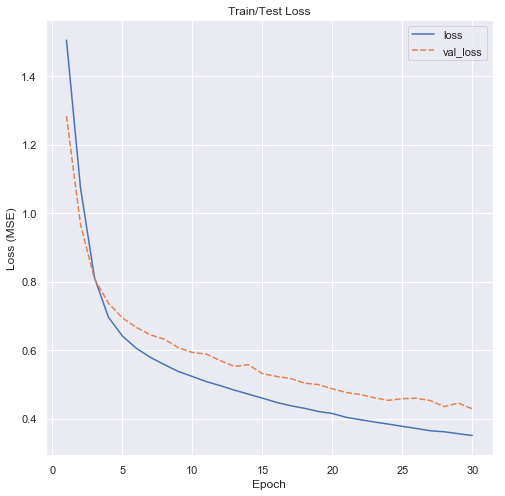

In [40]:
plt.figure(figsize=(8,8))
sns.lineplot(data=epochs[['loss','val_loss']]).set(
    title='Train/Test Loss',xlabel='Epoch',ylabel='Loss (MSE)')

## Plot the three accuracy metrics of the training and testing data over epochs in side-by side plots.
Be careful about your indexing!

[Text(0, 0.5, 'MAPE'),
 Text(0.5, 0, 'Epoch'),
 Text(0.5, 1.0, 'Mean Absolute Percentage Errors')]

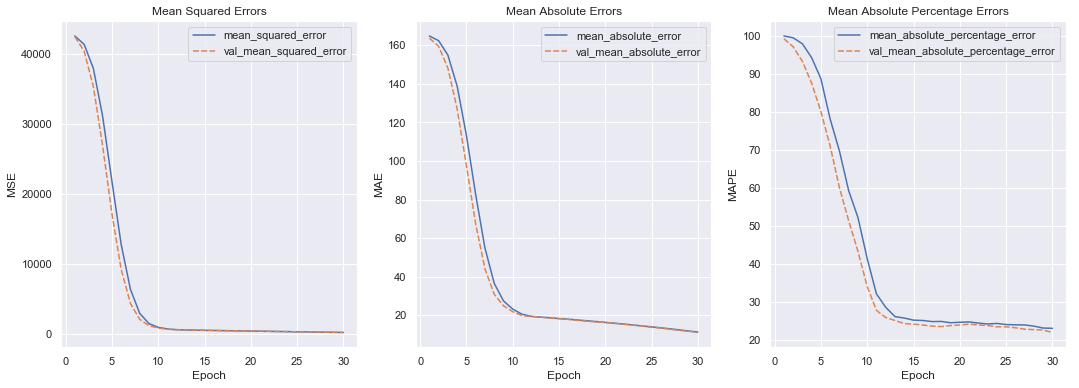

In [41]:
fig, axs = plt.subplots(ncols=3, figsize=(18,6))
sns.lineplot(data=epochs[['mean_squared_error','val_mean_squared_error']],ax=axs[0]).set(
    title='Mean Squared Errors',xlabel='Epoch',ylabel='MSE')
sns.lineplot(data=epochs[['mean_absolute_error','val_mean_absolute_error']],ax=axs[1]).set(
    title='Mean Absolute Errors',xlabel='Epoch',ylabel='MAE')
sns.lineplot(data=epochs[['mean_absolute_percentage_error',
                          'val_mean_absolute_percentage_error']],ax=axs[2]).set(
    title='Mean Absolute Percentage Errors',xlabel='Epoch',ylabel='MAPE')